In [1]:
import numpy as np
import pandas as pd

In [3]:
data_df = pd.read_csv('../DataSet/QueryResults.csv')

In [4]:
data_df.head()

m     TagName  Unnamed: 2
0  2008-07-01 00:00:00          c#           3
1  2008-08-01 00:00:00    assembly           8
2  2008-08-01 00:00:00  javascript         162
3  2008-08-01 00:00:00           c          85
4  2008-08-01 00:00:00      python         124

In [8]:
data_df.rename(columns={'m':'Date', 'TagName': 'Tag', 'Unnamed: 2':'Posts'}, inplace=True)

In [9]:
data_df.head()

Date         Tag  Posts
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124

In [10]:
data_df.tail()

Date    Tag  Posts
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607

In [12]:
# Number of rows and columns
data_df.shape

(1991, 3)

In [13]:
# Entries in each column
data_df.count()

Date     1991
Tag      1991
Posts    1991
dtype: int64

In [14]:
grouped_data = data_df.groupby('Tag') # Grouping data on tags

In [24]:
grouped_data.sum().sort_values('Posts', ascending=False) # language with most posts

Posts
Tag                
javascript  2056510
java        1696403
python      1496210
c#          1423530
php         1361988
c++          684210
r            356799
c            336042
swift        273055
ruby         214582
perl          65286
go            47499
delphi        46212
assembly      34852

In [25]:
grouped_data.count().sort_values('Posts', ascending=False)

Date  Posts
Tag                    
c#           145    145
assembly     144    144
c            144    144
c++          144    144
delphi       144    144
java         144    144
javascript   144    144
perl         144    144
php          144    144
python       144    144
ruby         144    144
r            142    142
swift        135    135
go           129    129

In [27]:
# Converting the date columns
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.head()

Date         Tag  Posts
0 2008-07-01          c#      3
1 2008-08-01    assembly      8
2 2008-08-01  javascript    162
3 2008-08-01           c     85
4 2008-08-01      python    124

In [38]:
# Creating a pivot table
reshaped_df = data_df.pivot(index='Date', columns='Tag', values='Posts')
reshaped_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)

In [29]:
reshaped_df.head()

Tag         assembly      c      c#    c++  delphi  go    java  javascript  \
Date                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

Tag          perl    php  python    r   ruby  swift  
Date                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0    NaN  
2008-10-01  127.0  617.0   510.0  NaN  249.0    NaN  
2008-11-01   97.0  504.0   452.0  1.0  160.0    NaN

In [30]:
reshaped_df.shape

(145, 14)

In [31]:
reshaped_df.tail()

Tag         assembly       c       c#     c++  delphi     go     java  \
Date                                                                    
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

Tag         javascript   perl     php   python       r   ruby   swift  
Date                                                                   
2020-03-01     20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01     24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01     25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01     23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01     23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0

In [32]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [33]:
reshaped_df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [34]:
reshaped_df.isna().sum()

Tag
assembly       1
c              1
c#             0
c++            1
delphi         1
go            16
java           1
javascript     1
perl           1
php            1
python         1
r              3
ruby           1
swift         10
dtype: int64

In [35]:
reshaped_df.fillna(0, inplace=True)

In [36]:
reshaped_df.isna().sum()

Tag
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

In [37]:
# Starting the visualization
import matplotlib.pyplot as plt

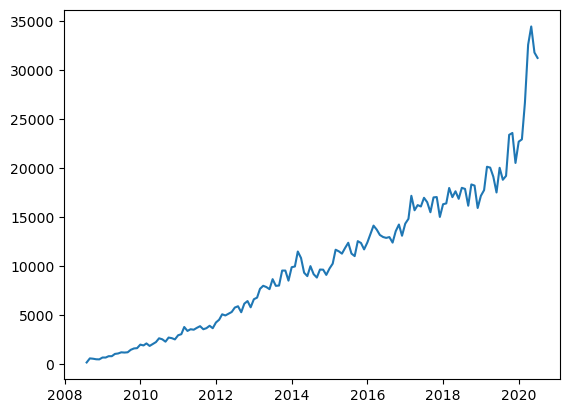

In [40]:
# Line chart for popularity of a programing language
plt.plot(reshaped_df.index, reshaped_df.python)

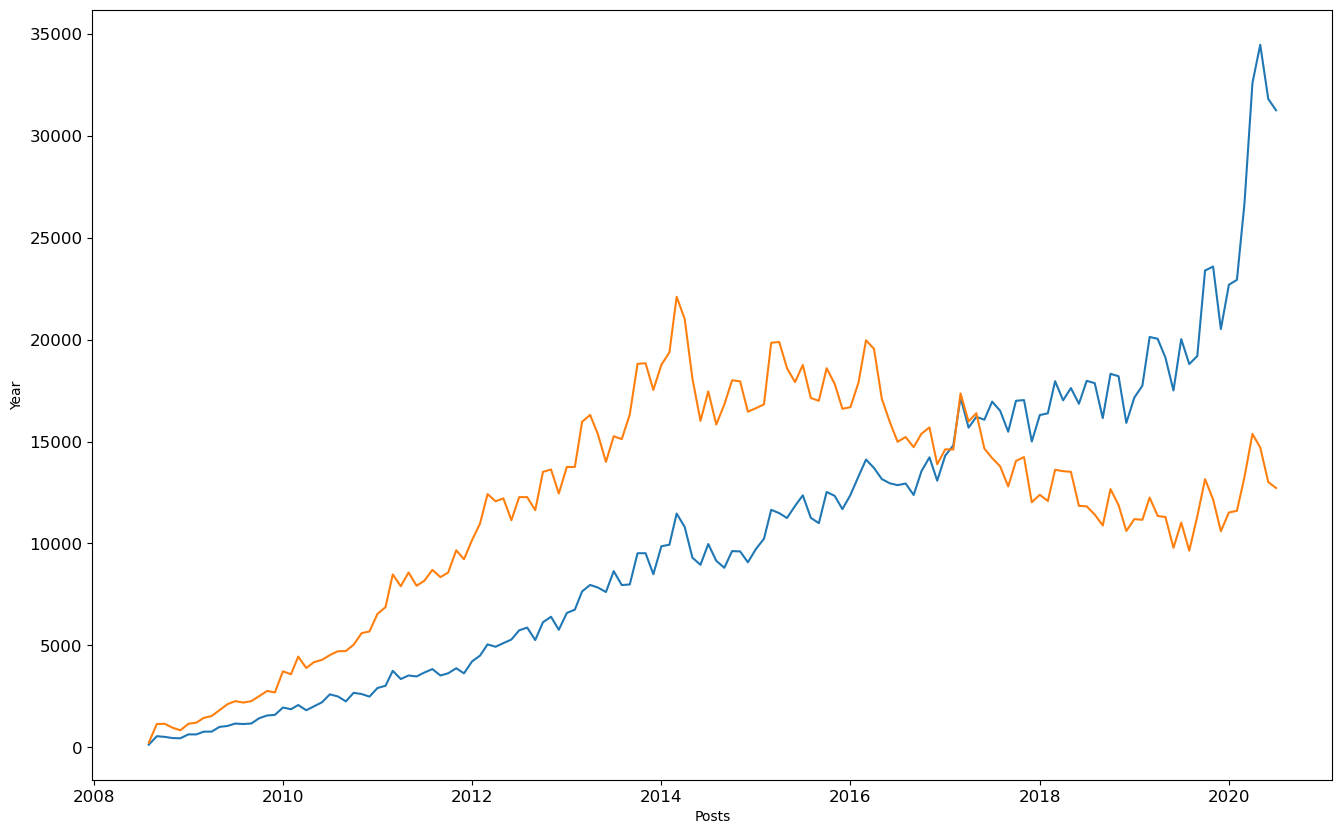

In [45]:
# Styling our chart
plt.figure(figsize=(16,10)) # resizing our chart
plt.xticks(fontsize=12) # configures our x-axis
plt.yticks(fontsize=12) # configures our y-axis
plt.xlabel("Posts") # add text to x-axis
plt.ylabel('Year') # add text to y-axis\
plt.plot(reshaped_df.index, reshaped_df.python)
plt.plot(reshaped_df.index, reshaped_df.java)

In [52]:
# Plotting for all languages
plt.figure(figsize=(16,10)) # resizing our chart
plt.xticks(fontsize=14) # configures our x-axis
plt.yticks(fontsize=14) # configures our y-axis
plt.xlabel("Posts", fontsize=14) # add text to x-axis
plt.ylabel('Year', fontsize=14) # add text to y-axis
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=14)

In [55]:
# Smoothing our data series for better visualization
roll_df = reshaped_df.rolling(window=10).mean()

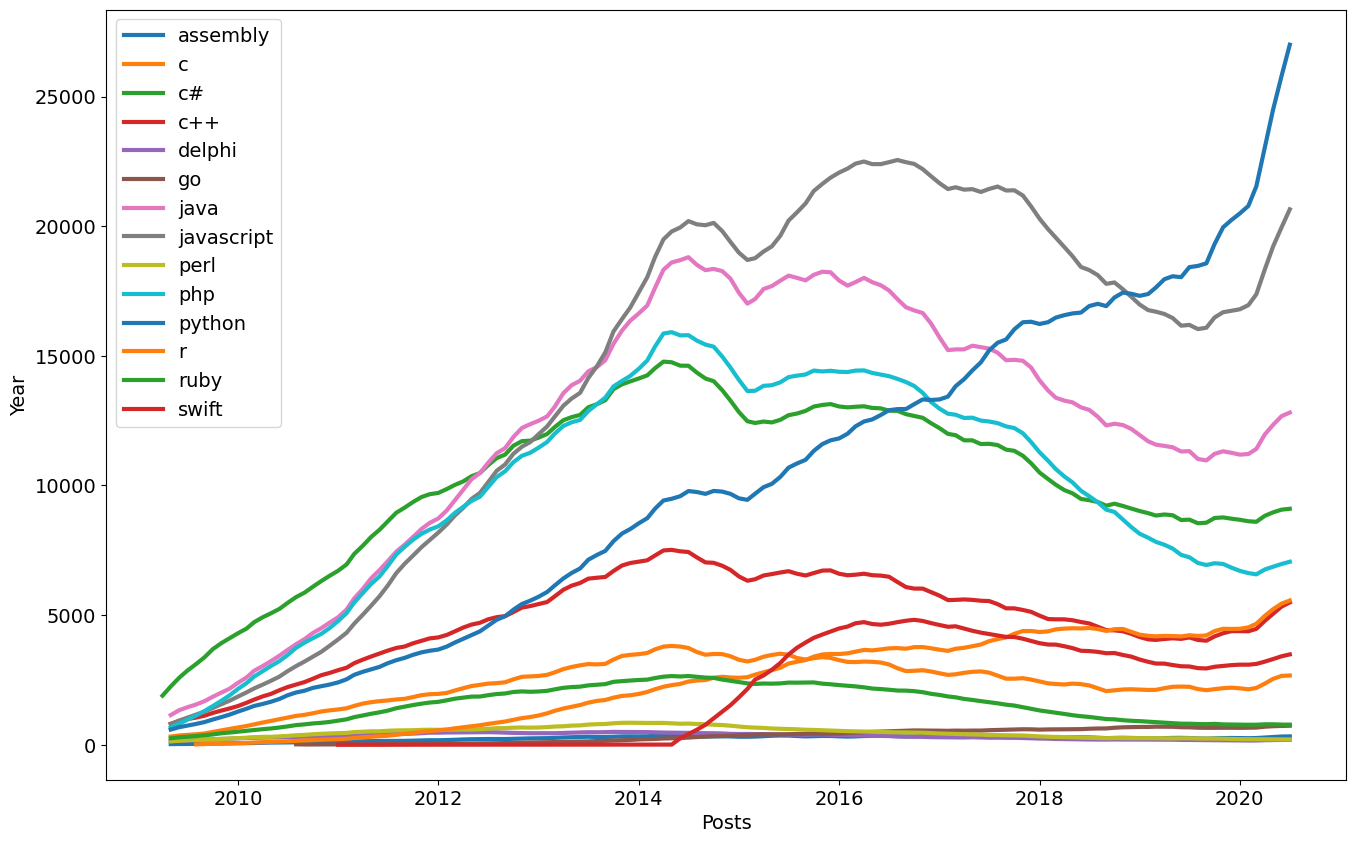

In [56]:
# Plotting for all languages
plt.figure(figsize=(16,10)) # resizing our chart
plt.xticks(fontsize=14) # configures our x-axis
plt.yticks(fontsize=14) # configures our y-axis
plt.xlabel("Posts", fontsize=14) # add text to x-axis
plt.ylabel('Year', fontsize=14) # add text to y-axis
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=14)